In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import networkx as nx
from pyvis.network import Network

In [2]:
df = pd.read_excel("store/base_combination.xlsx")

In [3]:
df = df.drop(columns=["Unnamed: 0"])

In [4]:
df.shape

(2035, 7)

# Specific conditions

In [5]:
df['Nội dung hỗ trợ'].value_counts()

Nội dung hỗ trợ
Thanh lý hợp đồng internet                   1154
Thanh lý hợp đồng truyền hình trong combo     503
Thanh lý hợp đồng combo                       131
Tạm ngưng hợp đồng internet                    91
Tư vấn về cước                                 38
Thay đổi gói cước internet                     31
Thanh lý hợp đồng truyền hình                  22
Giải quyết sự cố mạng                          19
Hỗ trợ kĩ thuật                                16
Thay đổi địa điểm sử dụng dịch vụ              14
Thanh lý hợp đồng camera                     9
Thanh lý hợp đồng internet trong combo          4
Thay đổi gói cước combo                         3
Name: count, dtype: int64

In [6]:
condition = (df['Nội dung hỗ trợ'] == "Thanh lý hợp đồng internet") & (df['Reason'] == 'n40') & (df["Solution Result"] == "Thành công")

# condition = (df['Nội dung hỗ trợ'] == "Thanh lý hợp đồng internet") & (df["Solution Result"] == "Thành công")

# condition = (df["Solution Result"] == "Không thành công")

In [7]:
processing_df = df[condition]

# processing_df = df

In [8]:
processing_df

,case_id,Nội dung hỗ trợ,Reason,Reason Group,Solution,Combination,Solution Result
144,35,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s4,dx1+dx10,Thành công
382,106,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s2,ll4+dx1+dx14,Thành công
517,154,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s2,dx1+dx6+dx13+ll6,Thành công
582,174,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s2,dx1+dx8+dx14,Thành công
590,177,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s3,dx1+dx6,Thành công
592,178,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s2,dx1+ll7+ll4,Thành công
616,185,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s2,dx1+ll25,Thành công
750,237,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s1,dx11+ll7+dx1,Thành công
1001,327,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s1,dx1+ll3+ll7,Thành công
1085,361,Thanh lý hợp đồng internet,n40,Nguyên nhân liên quan đến chất lượng dịch vụ,s2,dx11+dx1+dx6,Thành công


# Generate graph

In [9]:
def generate_graph(df):
    G = nx.Graph()
    
    edge_count = {}

    for index, row in df.iterrows():
        # Split the 'Combination' column into components
        components = row["Combination"].split('+')

        # Add edges between all pairs of components in the same row
        for i in range(len(components)):
            for j in range(i + 1, len(components)):
                # Sort the pair of components to avoid duplicate edges (ds8, hd13) vs (hd13, ds8)
                edge = tuple(sorted([components[i], components[j]]))

                # Count occurrences of each edge
                if edge in edge_count:
                    edge_count[edge] += 1
                else:
                    edge_count[edge] = 1

    # Add edges to the graph
    for edge, count in edge_count.items():
        G.add_edge(edge[0], edge[1], weight=count)

    return G

In [10]:
G = generate_graph(processing_df)

In [11]:
print(G)

Graph with 15 nodes and 28 edges


In [12]:
for edge in G.edges(data=True):
    print(edge)

('dx1', 'dx10', {'weight': 1})
('dx1', 'll4', {'weight': 3})
('dx1', 'dx14', {'weight': 6})
('dx1', 'dx6', {'weight': 3})
('dx1', 'dx13', {'weight': 1})
('dx1', 'll6', {'weight': 1})
('dx1', 'dx8', {'weight': 1})
('dx1', 'll7', {'weight': 3})
('dx1', 'll25', {'weight': 3})
('dx1', 'dx11', {'weight': 3})
('dx1', 'll3', {'weight': 1})
('dx1', 'hd3', {'weight': 2})
('dx1', 'gt10', {'weight': 1})
('dx1', 'dx2', {'weight': 1})
('ll4', 'dx14', {'weight': 2})
('ll4', 'll7', {'weight': 1})
('dx14', 'dx8', {'weight': 1})
('dx14', 'dx11', {'weight': 1})
('dx14', 'gt10', {'weight': 1})
('dx14', 'dx2', {'weight': 1})
('dx6', 'dx13', {'weight': 1})
('dx6', 'll6', {'weight': 1})
('dx6', 'dx11', {'weight': 1})
('dx13', 'll6', {'weight': 1})
('ll7', 'dx11', {'weight': 1})
('ll7', 'll3', {'weight': 1})
('ll25', 'hd3', {'weight': 1})
('gt10', 'dx2', {'weight': 1})


# convert to frequency_df

In [13]:
# Extract edges with weights
temp_data = [(f"{u}+{v}", attr['weight']) for u, v, attr in G.edges(data=True)]

# Create a DataFrame
frequency_df = pd.DataFrame(temp_data, columns=['combination', 'frequency'])

In [14]:
frequency_df

,combination,frequency
0,dx1+dx10,1
1,dx1+ll4,3
2,dx1+dx14,6
3,dx1+dx6,3
4,dx1+dx13,1
5,dx1+ll6,1
6,dx1+dx8,1
7,dx1+ll7,3
8,dx1+ll25,3
9,dx1+dx11,3


# Louvain

In [15]:
partition = community_louvain.best_partition(G, weight='weight')

print("Phân cộng đồng (Louvain):")
for node, comm in partition.items():
    print(f"Node {node} nằm trong cộng đồng {comm}")

Phân cộng đồng (Louvain):
Node dx1 nằm trong cộng đồng 0
Node dx10 nằm trong cộng đồng 0
Node ll4 nằm trong cộng đồng 1
Node dx14 nằm trong cộng đồng 1
Node dx6 nằm trong cộng đồng 2
Node dx13 nằm trong cộng đồng 2
Node ll6 nằm trong cộng đồng 2
Node dx8 nằm trong cộng đồng 1
Node ll7 nằm trong cộng đồng 0
Node ll25 nằm trong cộng đồng 0
Node dx11 nằm trong cộng đồng 0
Node ll3 nằm trong cộng đồng 0
Node hd3 nằm trong cộng đồng 0
Node gt10 nằm trong cộng đồng 1
Node dx2 nằm trong cộng đồng 1


In [16]:
partition_df = pd.DataFrame(list(partition.items()), columns=['Protocol', 'Community'])

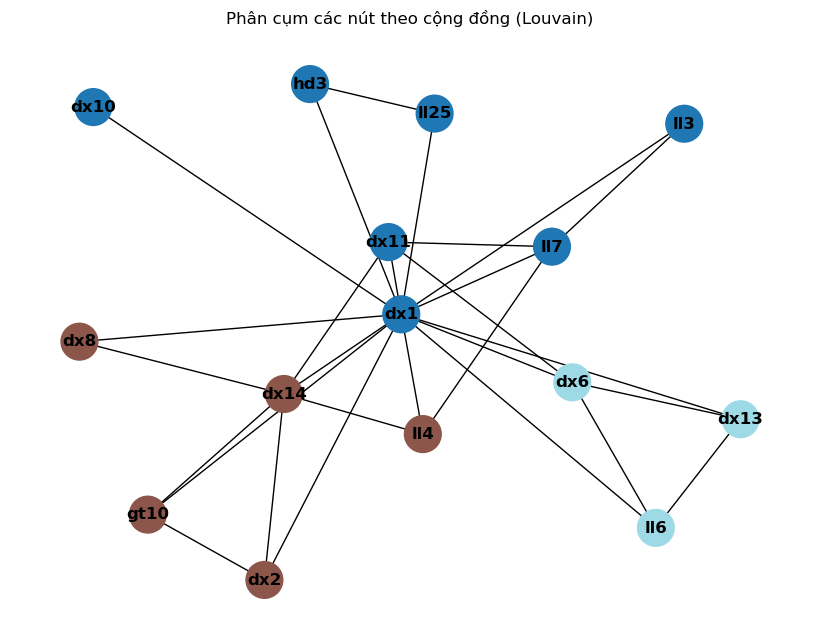

In [17]:
# Tạo danh sách màu sắc dựa trên cộng đồng
colors = [partition[node] for node in G.nodes()]

# Vẽ đồ thị với màu sắc theo cộng đồng
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color=colors, node_size=700, cmap=plt.cm.tab20, font_weight="bold")
plt.title("Phân cụm các nút theo cộng đồng (Louvain)")
plt.show()

In [18]:
# Tạo đối tượng Pyvis Network
net = Network(notebook=True)

# Danh sách các màu sắc tương phản (màu sắc có thể được tuỳ chỉnh thêm)
community_colors = [
    "rgb(255, 0, 0)",     # Đỏ
    "rgb(0, 255, 0)",     # Xanh lá
    "rgb(0, 0, 255)",     # Xanh dương
    "rgb(255, 255, 0)",   # Vàng
    "rgb(0, 255, 255)",   # Xanh lam
    "rgb(255, 165, 0)",   # Cam
    "rgb(255, 105, 180)", # Hồng
    "rgb(128, 0, 128)",   # Tím
    "rgb(0, 128, 0)",     # Xanh lá đậm
    "rgb(255, 99, 71)"    # Đỏ cam
]

# Thêm các nút và màu sắc theo cộng đồng
for node in G.nodes():
    community = partition[node]  # Cộng đồng của nút
    color = community_colors[community % len(community_colors)]  # Lấy màu cho cộng đồng
    net.add_node(node, label=str(node), title=f"Cộng đồng {community}", color=color)

# Thêm các cạnh
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# Tắt chuyển động (physics) và phân tán các nút
net.force_atlas_2based(gravity=-100, central_gravity=0.01, spring_length=150, spring_strength=0.08, damping=0.9)
net.set_options("""
var options = {
  "physics": {
    "enabled": false
  },
  "layout": {
    "randomSeed": 42
  }
}
""")

# Hiển thị đồ thị
net.show("community_detection_static_spread.html")

community_detection_static_spread.html


# Social Analysis

In [19]:
pagerank = nx.pagerank(G)

sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("Top 10 PageRank:")
for i, (node, rank) in enumerate(sorted_pagerank[:10], start=1):
    print(f"{i}. Node {node}: PageRank = {rank:.6f}")

Top 10 PageRank:
1. Node dx1: PageRank = 0.306073
2. Node dx14: PageRank = 0.121975
3. Node dx6: PageRank = 0.067319
4. Node ll7: PageRank = 0.065781
5. Node dx11: PageRank = 0.063512
6. Node ll4: PageRank = 0.062615
7. Node ll25: PageRank = 0.046568
8. Node dx13: PageRank = 0.039361
9. Node ll6: PageRank = 0.039361
10. Node gt10: PageRank = 0.038110


In [20]:
degree_centrality = nx.degree_centrality(G)

sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Degree Centrality:")
for i, (node, centrality) in enumerate(sorted_degree[:10], start=1):
    print(f"{i}. Node {node}: Degree Centrality = {centrality:.6f}")

Top 10 Degree Centrality:
1. Node dx1: Degree Centrality = 1.000000
2. Node dx14: Degree Centrality = 0.428571
3. Node dx6: Degree Centrality = 0.285714
4. Node ll7: Degree Centrality = 0.285714
5. Node dx11: Degree Centrality = 0.285714
6. Node ll4: Degree Centrality = 0.214286
7. Node dx13: Degree Centrality = 0.214286
8. Node ll6: Degree Centrality = 0.214286
9. Node gt10: Degree Centrality = 0.214286
10. Node dx2: Degree Centrality = 0.214286


In [21]:
# Calculate PageRank
pagerank = nx.pagerank(G)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Convert results to DataFrames
pagerank_df = pd.DataFrame(sorted_pagerank, columns=["Node", "PageRank"])
degree_centrality_df = pd.DataFrame(sorted_degree, columns=["Node", "Degree Centrality"])

# Export

In [22]:
# frequency_df.to_excel("social_network/tvcombo_n40_cannhac_frequency.xlsx")

In [23]:
# partition_df.to_excel("social_network/tvcombo_n40_cannhac_community.xlsx")

In [24]:
# # Save results to an Excel file
# output_path = "social_network/tvcombo_n40_cannhac_graph_centrality_analysis.xlsx" 
# with pd.ExcelWriter(output_path) as writer:
#     pagerank_df.to_excel(writer, sheet_name="PageRank", index=False)
#     degree_centrality_df.to_excel(writer, sheet_name="Degree Centrality", index=False)